<a href="https://colab.research.google.com/github/sumayabai/Hotel-Booking-EDA/blob/main/Hotel_Booking_Analysis_Sumaya_Bai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!
This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.
Explore and analyze the data to discover important factors that govern the bookings. 






Explore the dataset and check its sanity.
Further, Will explore data to find answers for the following questions:
1. Which month has the heighest and least  booking and from which country
2. Accomadtion type prefered by the guests.
3. How many bookings were cancelled and which month
4. Duration of guests visits.
5. Hotel type preffred by the guest(Resort or city hotel)
6. who are the most common customer type(transient,contract,group)
7. Has the reservation converted into succefull transaction



In [ ]:
#import neccesary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import and read the dataset 
working_directory = '/content/drive/My Drive/EDA Project/'
df = pd.read_csv(working_directory + 'Hotel Bookings.csv')

In [ ]:
#display the dataset
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.shape

(119390, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


**Dealing with null values**

In [ ]:
#to check how many missing data in the data set
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
#making a copy of the orginal dataset
df = df.copy()

In [ ]:
#company and distribution_channel column will not be relevant for our data analysis purpose, so drop those columns.
df.drop(['company','distribution_channel'],axis=1)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,0,0,0,C,C,3,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,0,0,0,C,C,4,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,0,0,0,A,C,0,No Deposit,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,0,0,0,A,A,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,0,0,0,E,E,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,0,0,0,D,D,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,0,0,0,A,A,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
#missing values for agent can be filled with 0.
df['agent'] = df['agent'].fillna(0)

In [ ]:
#missing values for country can be replaced with the mode value
# df['country'].value_counts()
df['country'].fillna(df.country.mode().to_string(), inplace=True)


In [ ]:
#replace the missing values of children column with the mode value

# df['children'].value_counts()
df['children'] = df['children'].fillna(0)



**Exploratory Data Analysis**

**1)To check the trend on which hotels type is prefreed the most;City hotel or resort hotel.**


Text(0, 0.5, 'Count')

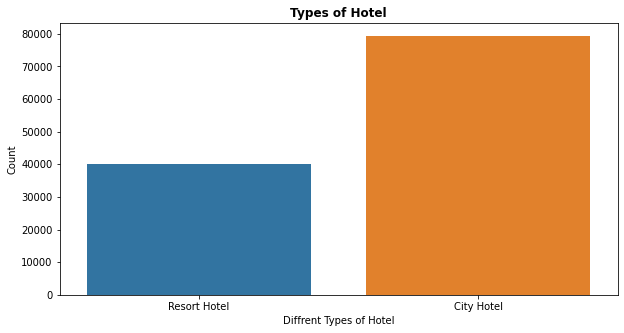

In [ ]:
df['hotel'].value_counts(normalize= True)*100

plt.figure(figsize=(10,5))
ax = sns.countplot(x="hotel", data=df)
plt.title('Types of Hotel',weight='bold')
plt.xlabel('Diffrent Types of Hotel')
plt.ylabel('Count')





*  The Above graph depicts information about which hotel type has occupied more guests.

*   It's clear from the graph that city hotel was more occupied than the resort hotel.




**2)Which is the busiest year and the month? Which is the best time in the year to book a hotel?** 

In [ ]:
df['arrival_date_month'].value_counts(normalize =True)*100


August       11.623252
July         10.604741
May           9.876037
October       9.347517
April         9.288048
June          9.162409
September     8.801407
March         8.203367
February      6.757685
November      5.690594
December      5.678868
January       4.966078
Name: arrival_date_month, dtype: float64

In [ ]:
#Create a new list to store the months in chrnological order.
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September','October', 'November', 'December']
# USING PD.CATEGORICAL() to reorder the months.(It sorts the variable in the logical order)
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=months, ordered=True)

Text(0, 0.5, 'Count')

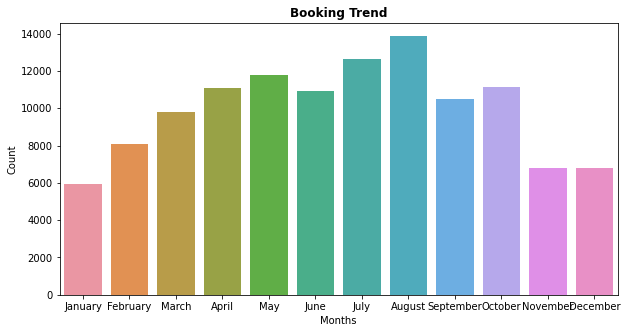

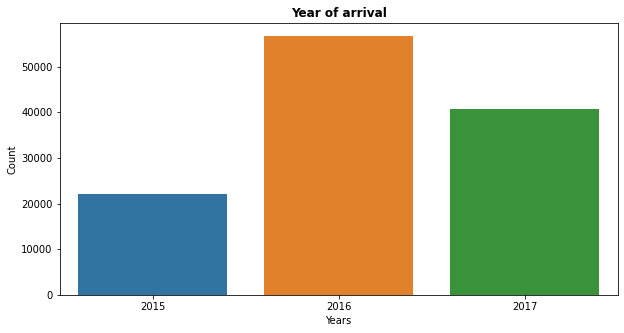

In [ ]:
#using a countplot to display the booking trend by months.
plt.figure(figsize=(10,5)) #figure_size
sns.countplot(x="arrival_date_month", data=df)  #column_name, dataframe
plt.title('Booking Trend',weight='bold')  #title of the graph
plt.xlabel('Months')  #title of x axis
plt.ylabel('Count')   #titleof y axis

plt.figure(figsize=(10,5))
ax = sns.countplot(x="arrival_date_year", data=df)
plt.title('Year of arrival',weight='bold')
plt.xlabel('Years')
plt.ylabel('Count')




*   The above graphs tell us about the trend of hotels occupied in the various months and years.
*   It can be depicted from the graph that the busiset month are July and August wheras January and December are off seasons.
*   From the dataset given, the year 2016 had more guests than 2015 and 2017








**Check the booking trend for both types of hotels**

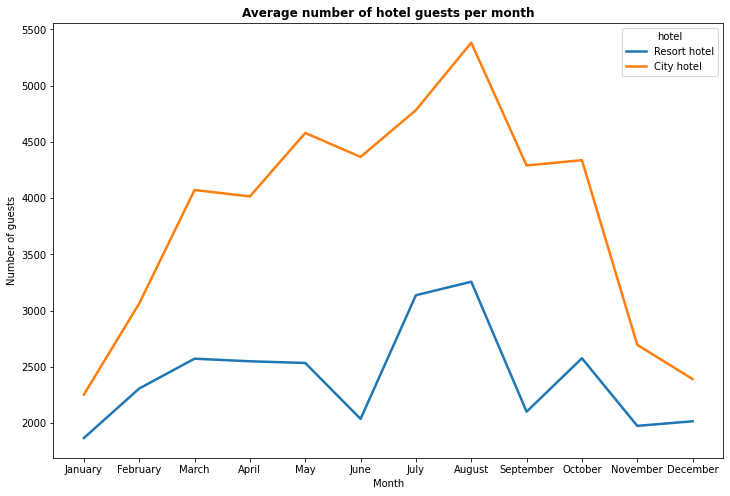

In [ ]:
#seperate the resort and city data into a new dataset, and take only the not canceled bookings.
resort=df[(df["hotel"]=="Resort Hotel")&(df["is_canceled"]==0)]
city=df[(df["hotel"]=="City Hotel")&(df["is_canceled"]==0)]
#to check the guests in resort hotel
resort_guests= resort.groupby("arrival_date_month")["hotel"].count()
resort_guests
#to check the guests in city hotel
city_guests= city.groupby("arrival_date_month")["hotel"].count()
city_guests

#create a new dataset with list of values for each months months for resort hotel
resort_guests_df = pd.DataFrame({"month": list(resort_guests.index),"hotel": "Resort hotel", "guests": list(resort_guests.values)})
#create a new dataset with list of values for each months months for city hotel
city_guests_df = pd.DataFrame({"month": list(city_guests.index),"hotel": "City hotel", "guests": list(city_guests.values)})

#concat both the data,to get the full guests data
combined_guests_df = pd.concat([resort_guests_df,city_guests_df])

#reorder the months
#Create a new list to store the months in chrnological order.
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September','October', 'November', 'December']
# USING PD.CATEGORICAL() to reorder the months.(It sorts the variable in the logical order)
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=months, ordered=True)

#plot the new data into a line plot
plt.figure(figsize=(12, 8))
sns.lineplot(x = "month", y="guests", hue="hotel", data=combined_guests_df, 
              size="hotel", sizes=(2.5, 2.5))
plt.title("Average number of hotel guests per month",weight ='bold')
plt.xlabel("Month")
plt.ylabel("Number of guests")
plt.show()



*   The above graphs shows the booking trend classified on the types of hotels.
*   August is the most occupied month with 11.65% bookings and January is the least occupied month with 4.94% bookings.



**3)Is there a significant diffrence in the ADR(Average Daily Rate) during peak seasons and off seasons?**

---



In [ ]:
df['adr'].value_counts()


62.00     3754
75.00     2715
90.00     2473
65.00     2418
0.00      1959
          ... 
202.74       1
87.64        1
69.83        1
160.83       1
35.64        1
Name: adr, Length: 8879, dtype: int64

In [ ]:
#grouping the adr with that of the months.
df.groupby('arrival_date_month')['adr']

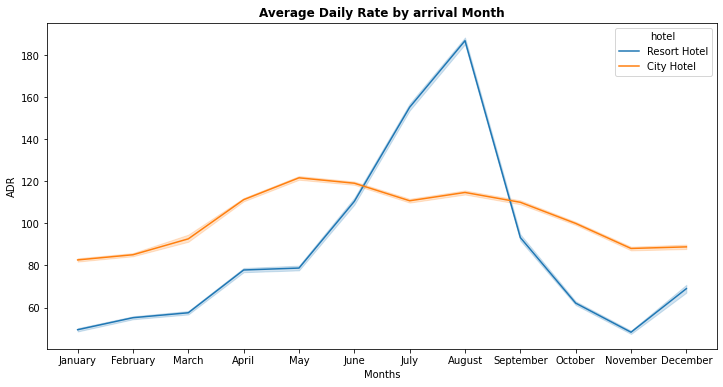

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data= df)
plt.title('Average Daily Rate by arrival Month',weight='bold')
plt.xlabel('Months')
plt.ylabel('ADR')
plt.show()

*   It can be infered from the plot that, Average daily rate(ADR) is higher during the peak seasons(July,August) and ADR is lower during off seasons.
*   The above diffrence is true for both city hotel as well as resort hotel.





**To check the correlation between adr with that of cancellations.**

In [ ]:
column_1 = df["adr"]
column_2 = df["is_canceled"]
correlation = column_1.corr(column_2)
correlation

0.047556597880386


*   The above function ; df.corr() is used to check the correlation between two numerical variaables.

*   It is clear from the output that there is no correlation between avreage daily rate with cancellations.






**4)The country that has most number of guests**

In [ ]:
#taking the top 10 countries from the list
df['country'].value_counts(normalize = True)[:10]


PRT    0.406986
GBR    0.101591
FRA    0.087235
ESP    0.071765
DEU    0.061035
ITA    0.031544
IRL    0.028269
BEL    0.019616
BRA    0.018628
NLD    0.017623
Name: country, dtype: float64

Text(0, 0.5, 'Count')

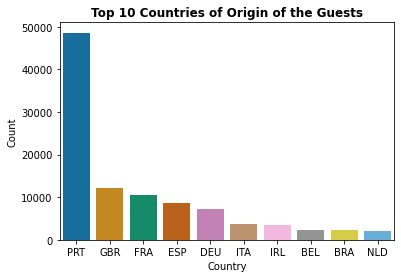

In [ ]:
sns.countplot(x='country', data=df,order=pd.value_counts(df['country']).iloc[:10].index,palette= 'colorblind')
plt.title('Top 10 Countries of Origin of the Guests', weight='bold')
plt.xlabel('Country')
plt.ylabel('Count')





*   The above graph depicts the information about the natinality of the customers.
*   It is depicted from the graph that most of the customers are from Portugal.



**5)The mode of booking(market segment(TA ,TO,Direct_booking)**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


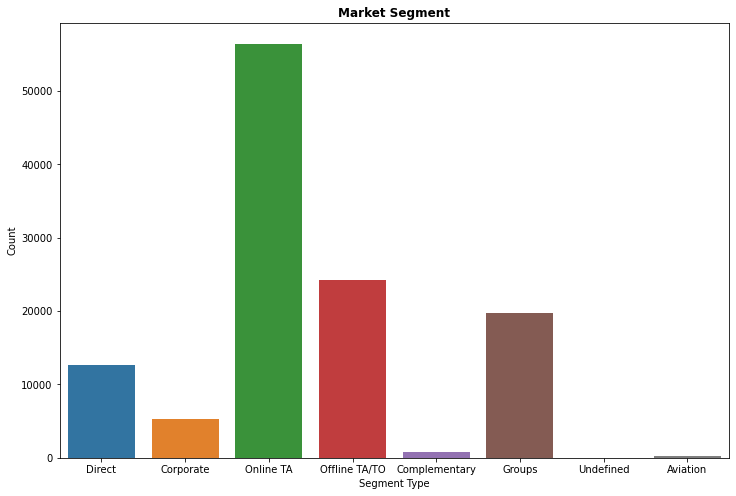

In [ ]:
df['market_segment'].value_counts()

plt.figure(figsize=(12,8))
sns.countplot(df['market_segment'])
plt.title('Market Segment', weight='bold')
plt.xlabel('Segment Type')
plt.ylabel('Count')
plt.show()






*   The above graph tells us about the mode of booking chose by customers.
*   It is clear that most of the customers book through Online Travel Agents(TA)followed by offline Travel Agents(TA) and Tour Operators(TO).






**7)What is average days to be in the waiting list**

---



In [ ]:
df.groupby('arrival_date_month')['days_in_waiting_list']

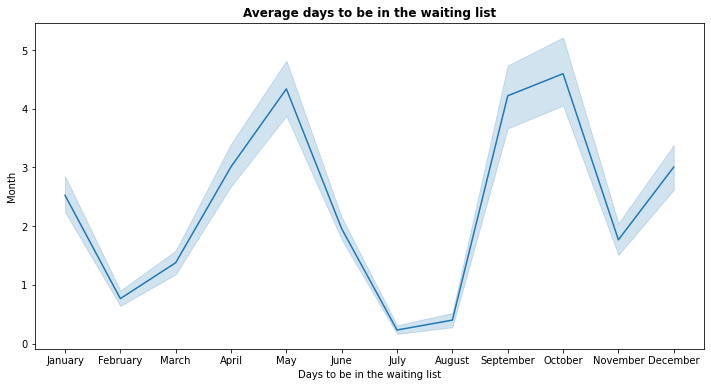

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='arrival_date_month', y='days_in_waiting_list', data= df)
plt.title('Average days to be in the waiting list',weight='bold')
plt.xlabel('Days to be in the waiting list')
plt.ylabel('Month')
plt.show()



*  It is infered from the above plot that, average days to be in the waiting list in peak seasons are low with that of off seasons.




**Correlation Graph( To find the realtion between Cancelled booking with other relevant information)**

In [ ]:
df1 = df.copy()

In [ ]:
#correaltion graph
df1 = df.corr()

In [ ]:
df1.shape

(20, 20)

In [ ]:
df1.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

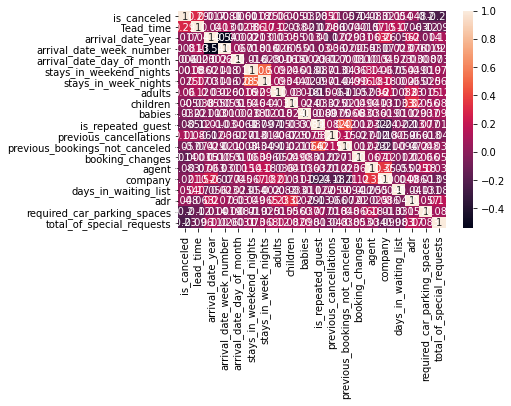

In [ ]:
sns.heatmap(df1, annot=True)
plt.show()
